In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
from IPython.display import display, HTML

In [2]:
df = pd.read_excel("zepto_v1.xlsx")

In [3]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [4]:
numeric_columns = ['mrp', 'discountedsellingprice', 'discountpercent', 'availablequantity', 'quantity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

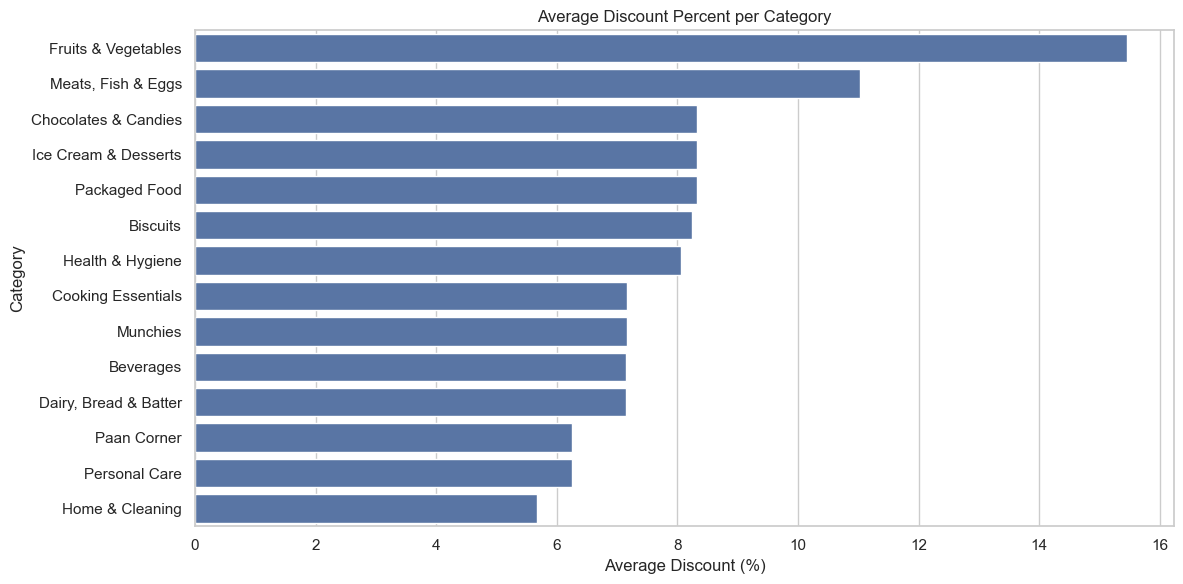

In [5]:
plt.figure(figsize=(12, 6))
avg_discount = df.groupby('category')['discountpercent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_discount.values, y=avg_discount.index)
plt.title("Average Discount Percent per Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

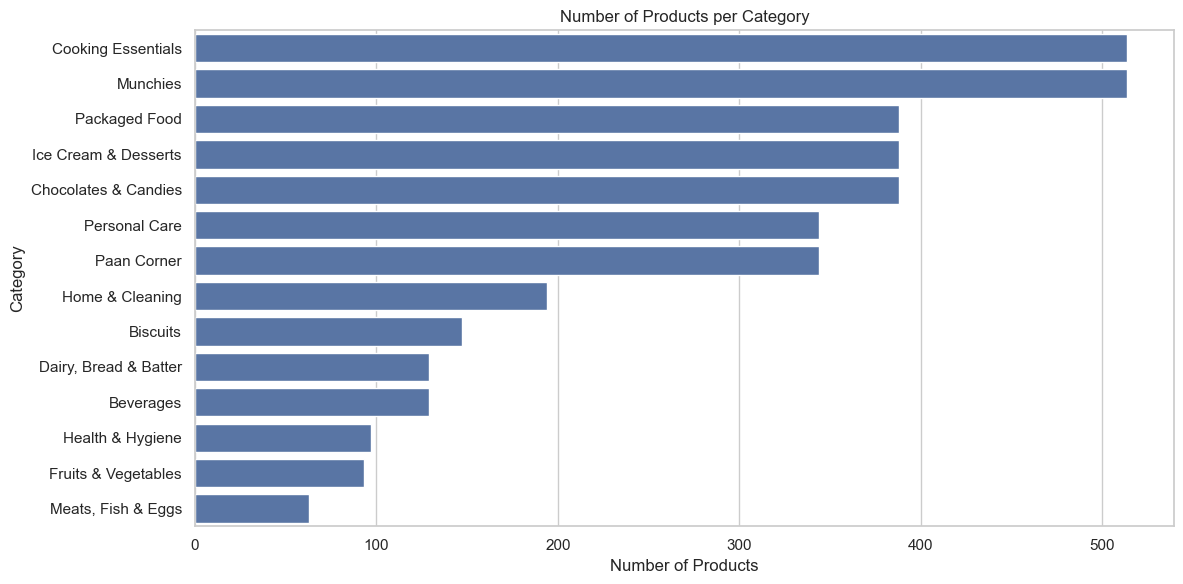

In [6]:
plt.figure(figsize=(12, 6))
product_count = df['category'].value_counts()
sns.barplot(x=product_count.values, y=product_count.index)
plt.title("Number of Products per Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [7]:
df['discount_bucket'] = pd.cut(df['discountpercent'], bins=[0, 10, 20, 30, 50, 100],
                                labels=['0-10%', '11-20%', '21-30%', '31-50%', '51%+'])


df['stock_status'] = df['outofstock'].map({False: 'In Stock', True: 'Out of Stock'})

sunburst_df = df.dropna(subset=['category', 'discount_bucket', 'stock_status'])

fig = px.sunburst(sunburst_df,
                  path=['category', 'discount_bucket', 'stock_status'],
                  values='availablequantity',
                  color='discount_bucket',
                  title="Sunburst: Category → Discount → Stock Status",
                  height=600)
fig.show()

C:\TOOL\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
C:\TOOL\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


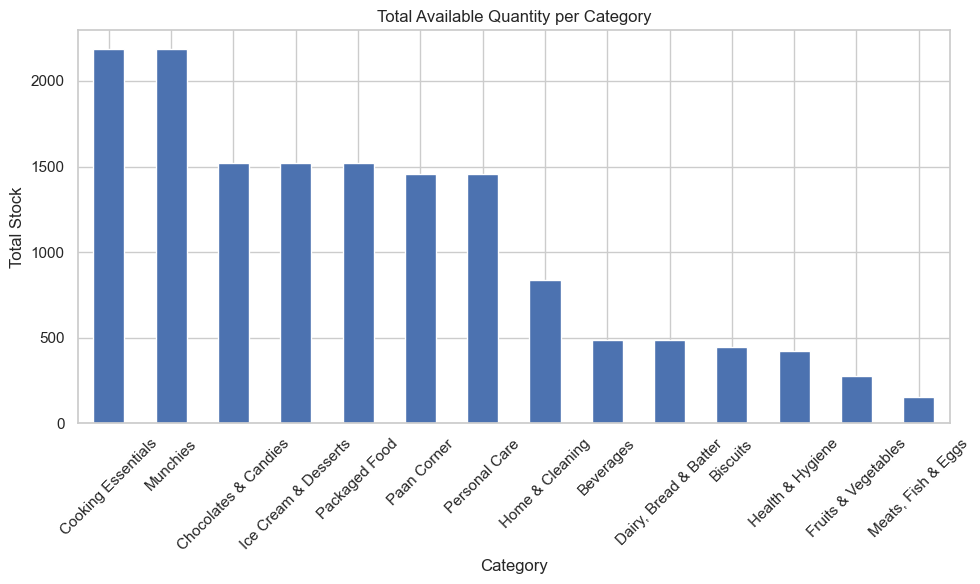

In [8]:
df.groupby('category')['availablequantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Total Available Quantity per Category")
plt.xlabel("Category")
plt.ylabel("Total Stock")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gowth\AppData\Local\Temp\ipykernel_2520\3184789181.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




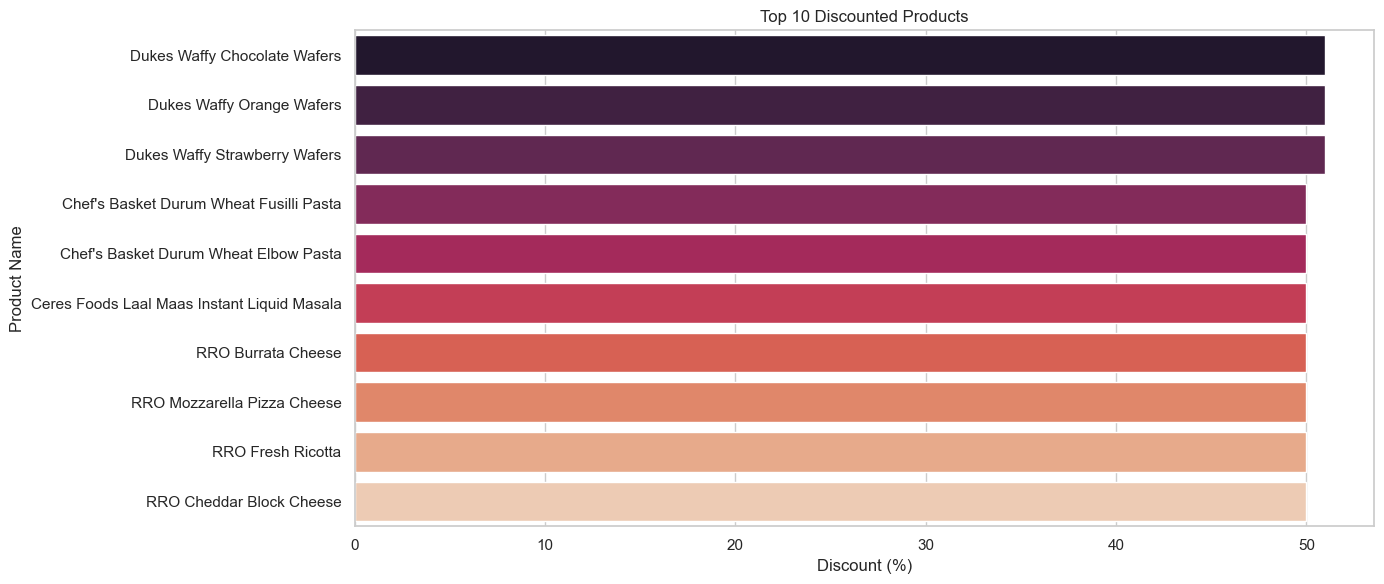

In [9]:
top_discounts = df.sort_values(by='discountpercent', ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x='discountpercent', y='name', data=top_discounts, palette="rocket")
plt.title("Top 10 Discounted Products")
plt.xlabel("Discount (%)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

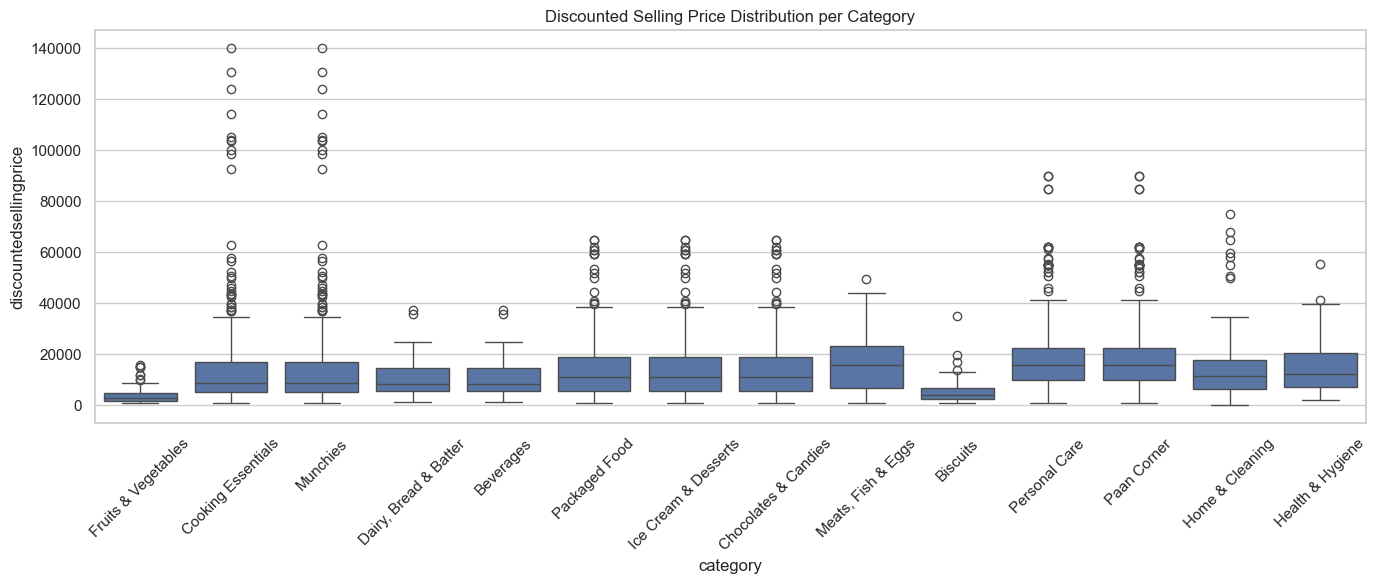

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='discountedsellingprice')
plt.title("Discounted Selling Price Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

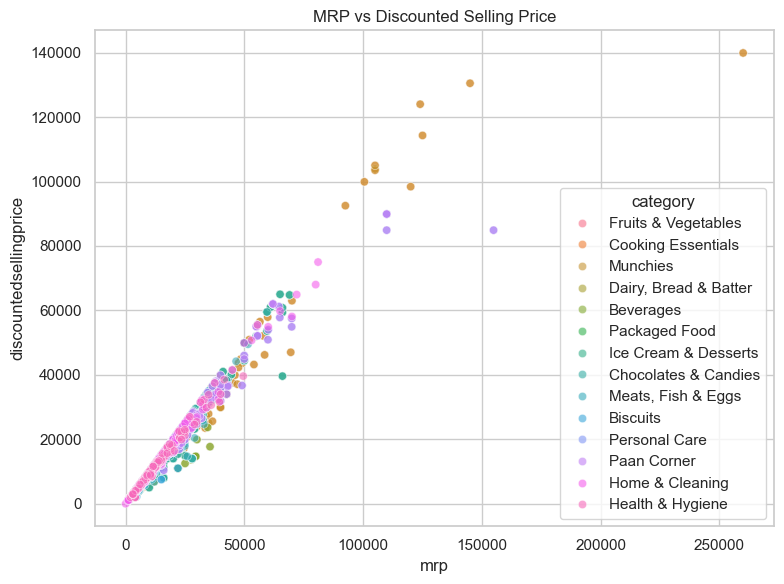

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mrp', y='discountedsellingprice', hue='category', alpha=0.6)
plt.title("MRP vs Discounted Selling Price")
plt.tight_layout()
plt.show()

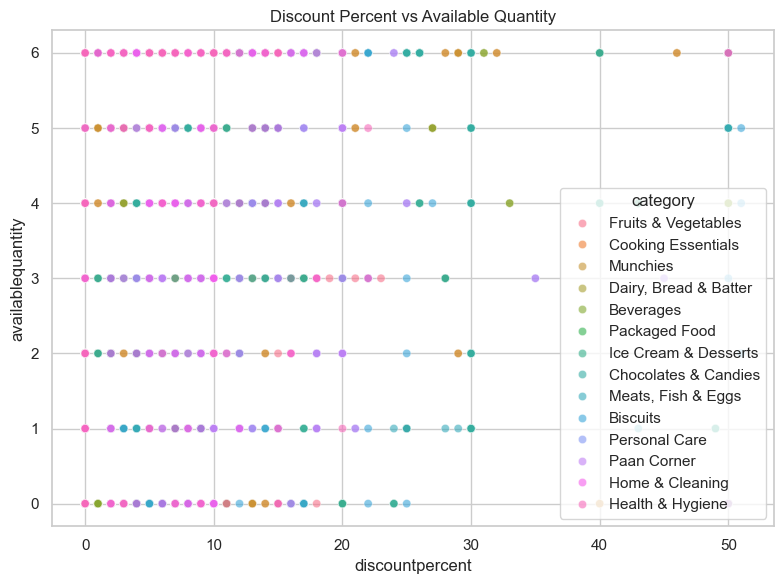

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discountpercent', y='availablequantity', hue='category', alpha=0.6)
plt.title("Discount Percent vs Available Quantity")
plt.tight_layout()
plt.show()

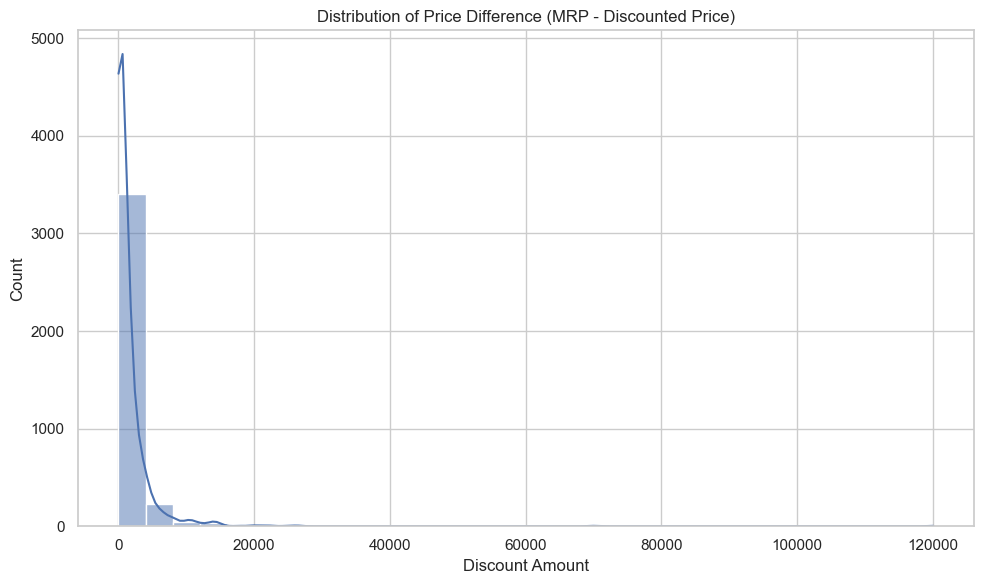

In [13]:
df['price_diff'] = df['mrp'] - df['discountedsellingprice']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff'], bins=30, kde=True)
plt.title("Distribution of Price Difference (MRP - Discounted Price)")
plt.xlabel("Discount Amount")
plt.tight_layout()
plt.show()

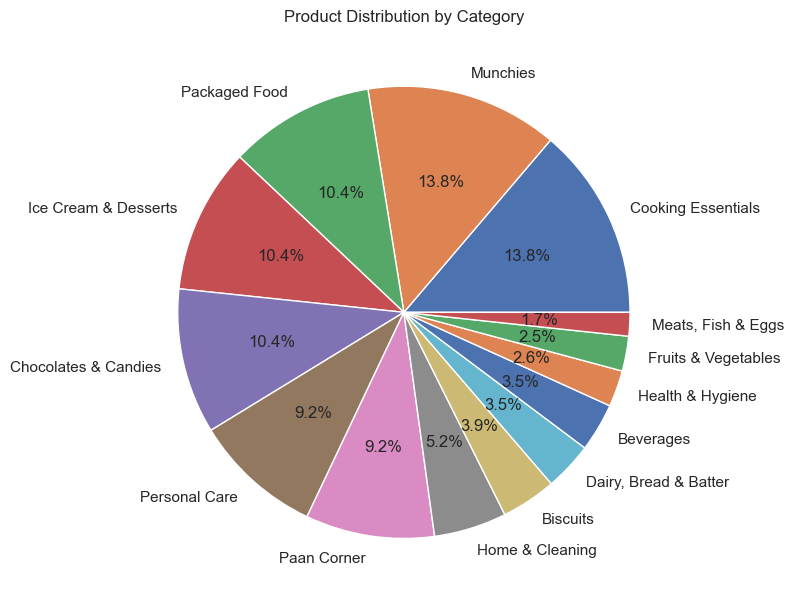

In [14]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Product Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

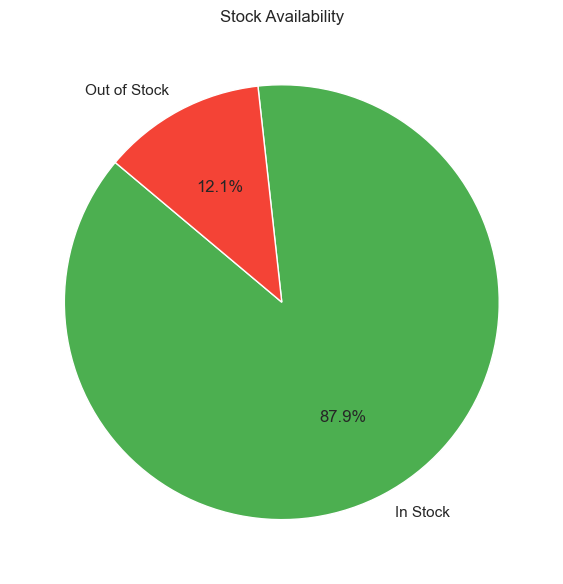

In [15]:
stock_counts = df['outofstock'].value_counts()
labels = ['In Stock', 'Out of Stock']
colors = ['#4caf50', '#f44336']

plt.figure(figsize=(6, 6))
plt.pie(stock_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Stock Availability")
plt.tight_layout()
plt.show()

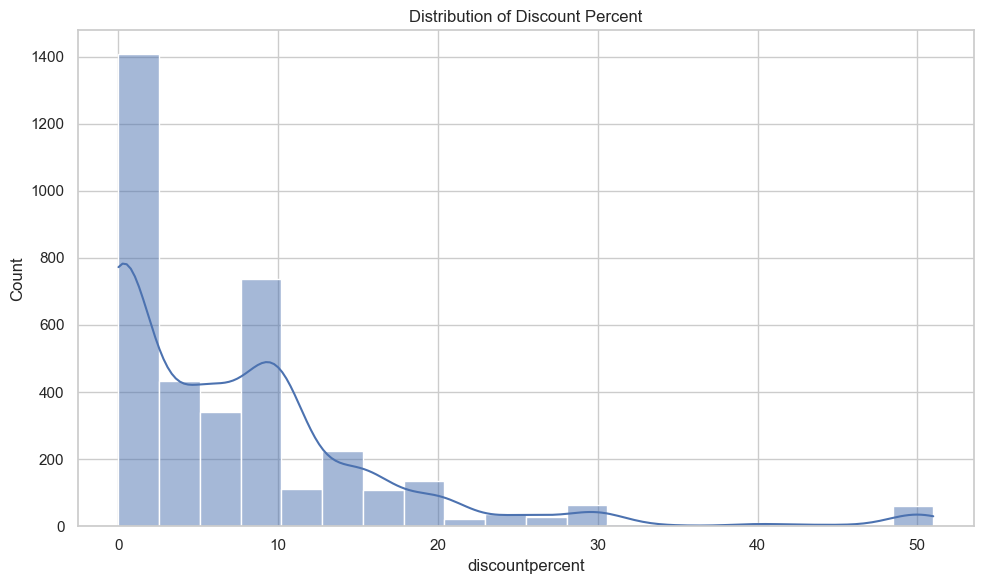

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discountpercent'], bins=20, kde=True)
plt.title("Distribution of Discount Percent")
plt.tight_layout()
plt.show()

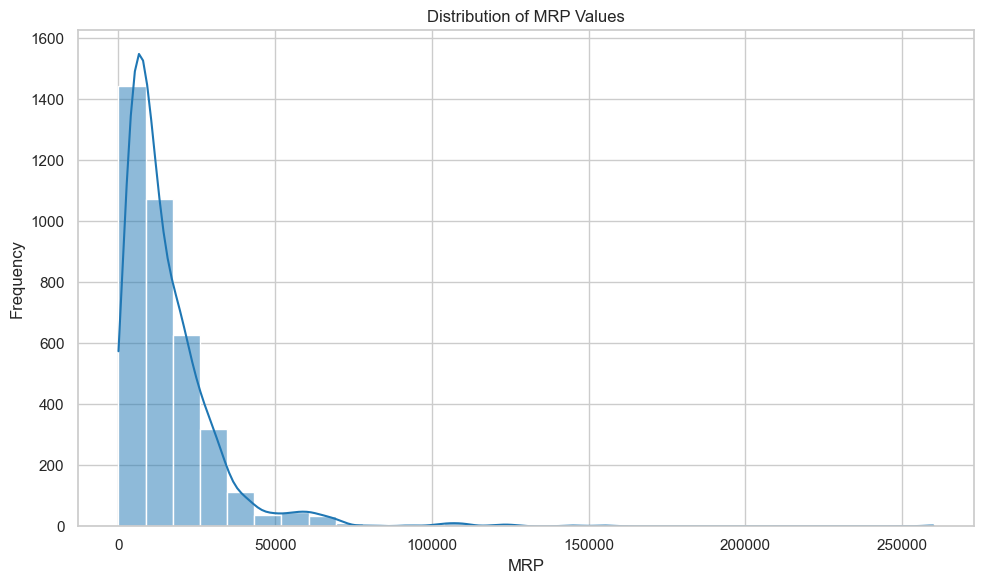

In [17]:
df['mrp'] = pd.to_numeric(df['mrp'], errors='coerce')

valid_mrp = df['mrp'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(valid_mrp, bins=30, kde=True, color='#1f77b4')
plt.title("Distribution of MRP Values")
plt.xlabel("MRP")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

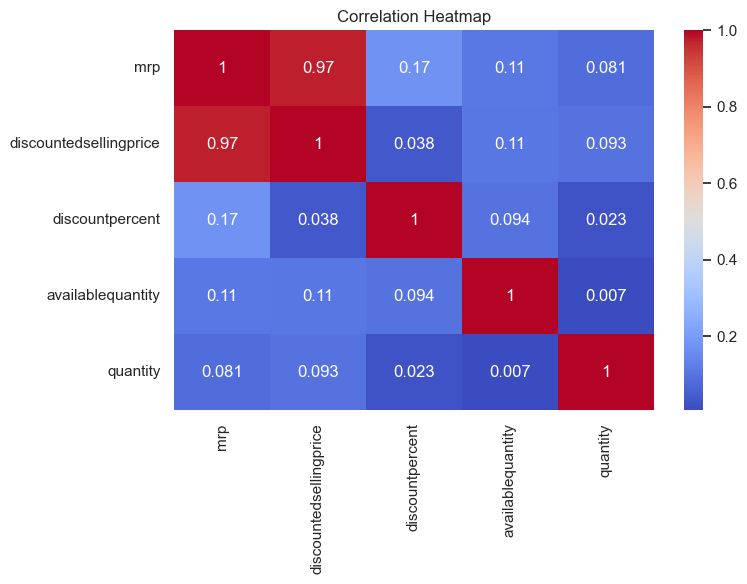

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

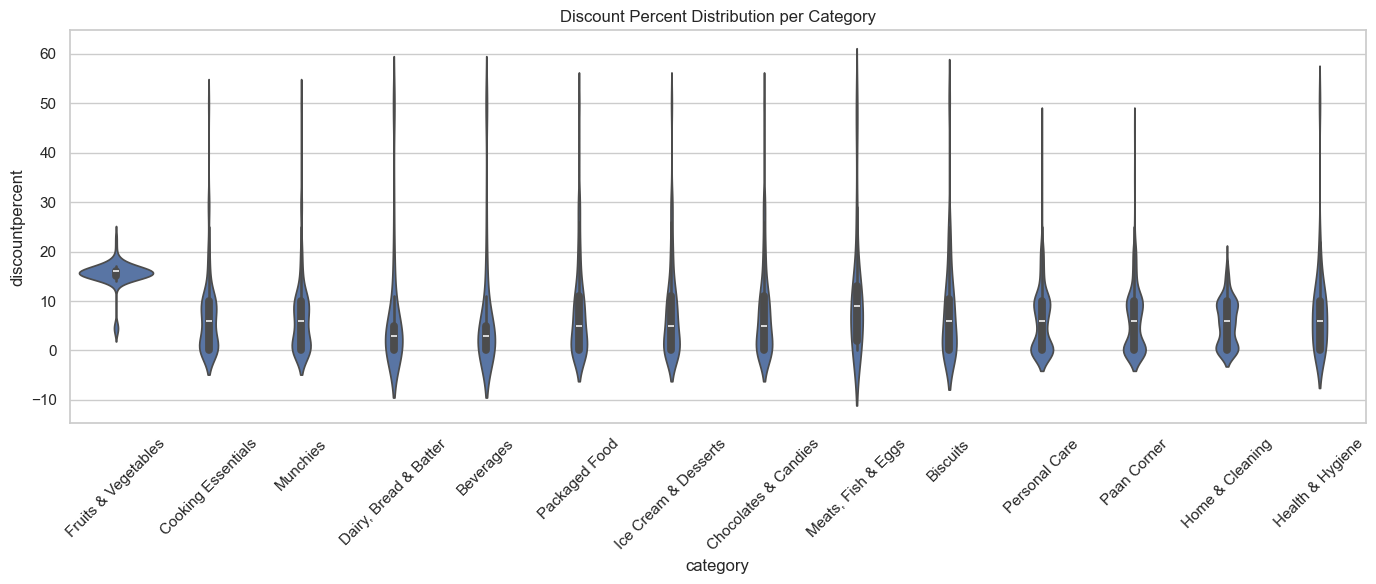

In [19]:
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='category', y='discountpercent')
plt.title("Discount Percent Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/violin_discount_by_category.png")
plt.show()

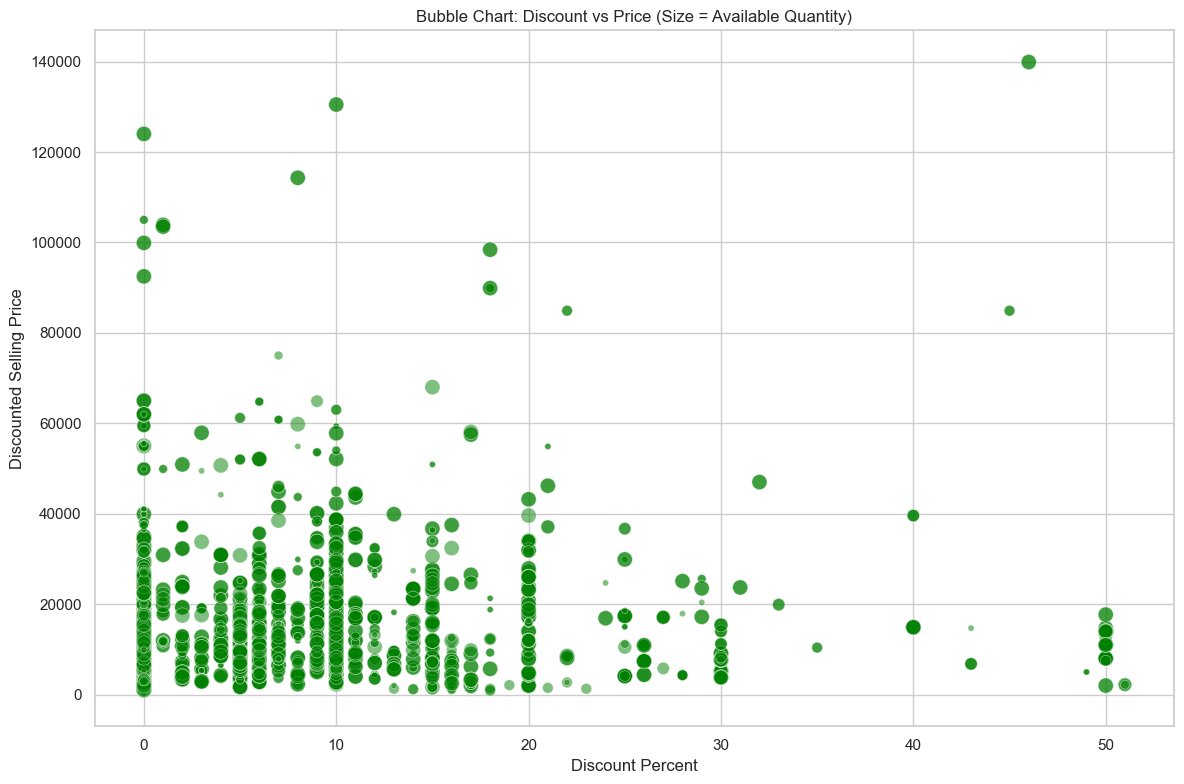

In [20]:
plt.figure(figsize=(12, 8))
bubble = df.copy()
plt.scatter(bubble['discountpercent'], bubble['discountedsellingprice'],
            s=bubble['availablequantity']*20, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.xlabel("Discount Percent")
plt.ylabel("Discounted Selling Price")
plt.title("Bubble Chart: Discount vs Price (Size = Available Quantity)")
plt.tight_layout()
plt.savefig(f"{output_dir}/bubble_discount_vs_price.png")
plt.show()

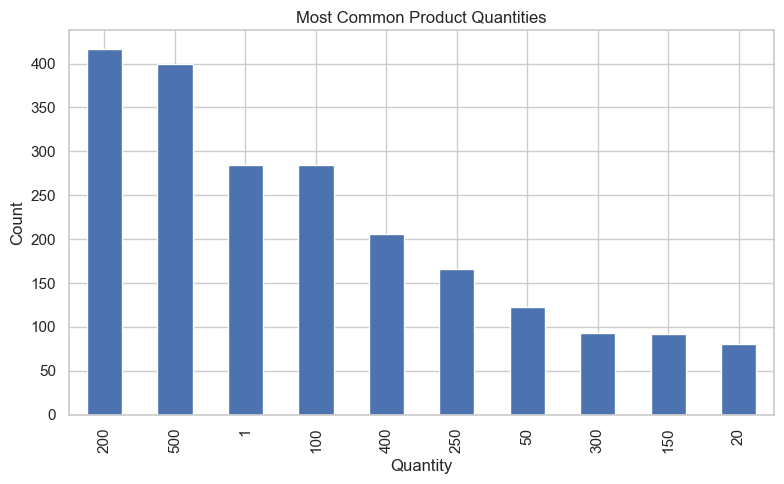

In [21]:
df['quantity'].value_counts().head(10).plot(kind='bar', figsize=(8,5))
plt.title("Most Common Product Quantities")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

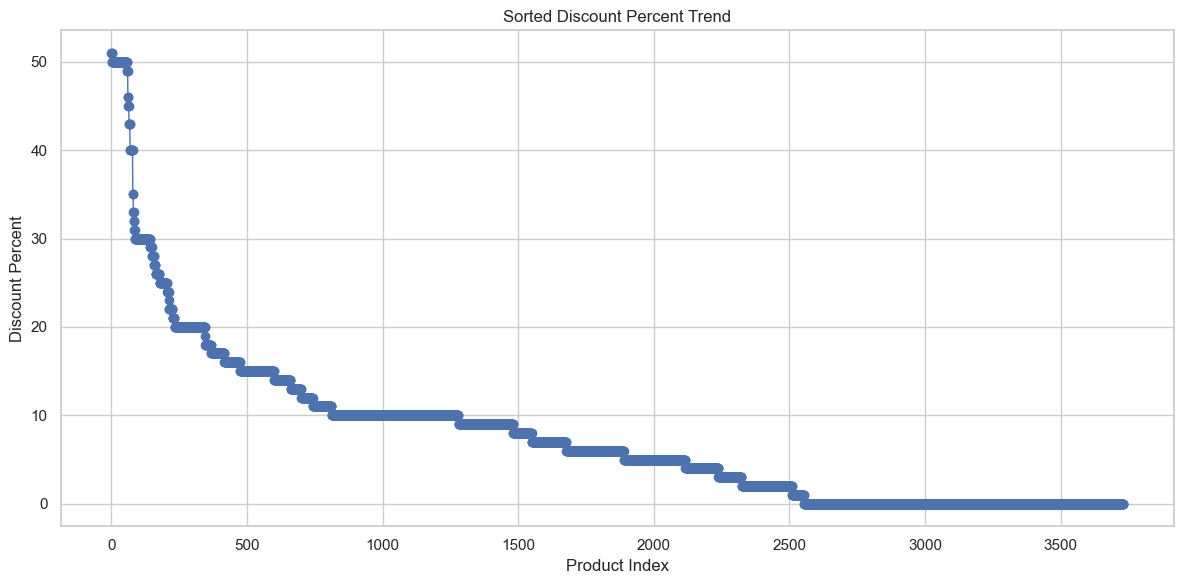

In [22]:
sorted_discounts = df.sort_values(by='discountpercent', ascending=False)['discountpercent'].reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(sorted_discounts, marker='o', linewidth=1)
plt.title("Sorted Discount Percent Trend")
plt.xlabel("Product Index")
plt.ylabel("Discount Percent")
plt.tight_layout()
plt.savefig(f"{output_dir}/line_discount_trend.png")
plt.show()